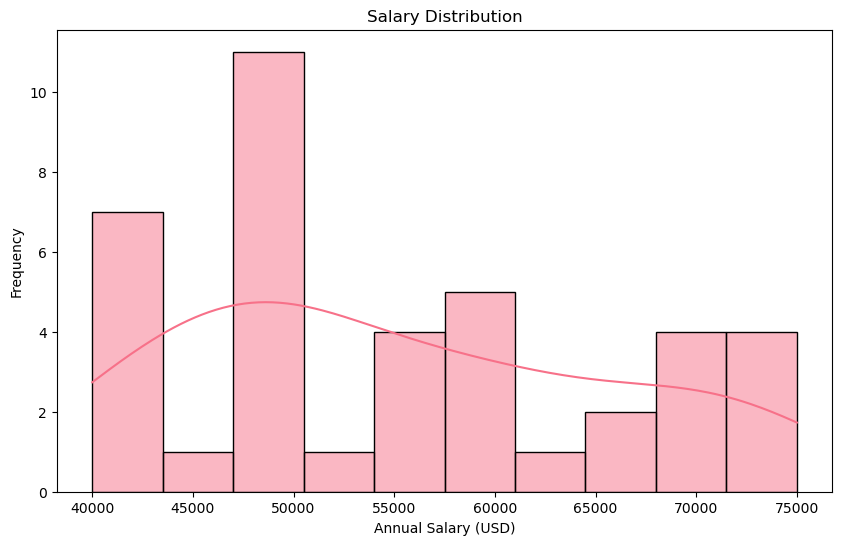

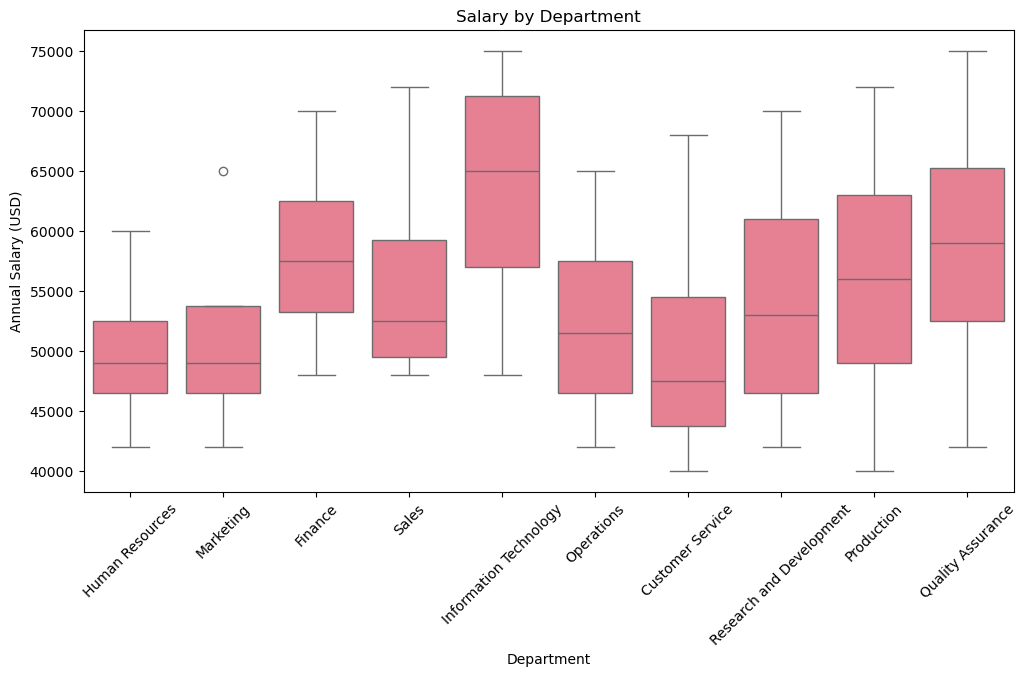

🔹 Classification Report (High vs Low Salary)
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.40      0.50      0.44         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8



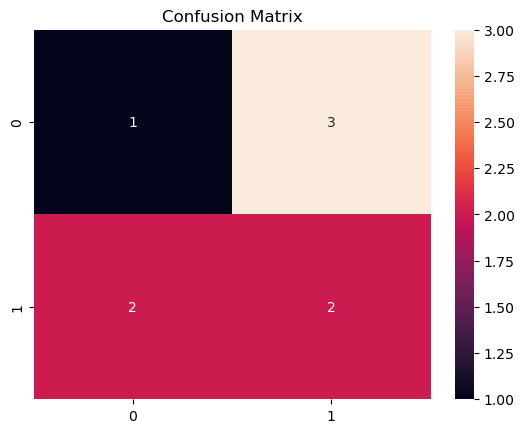

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#  Load & Clean Data
df = pd.read_csv('Employee-Management-Sample-Data.csv', skiprows=5)
df.columns = df.columns.str.strip()

# Drop rows with missing Employee ID or Salary
df.dropna(subset=['Employee ID', 'Annual Salary (USD)'], inplace=True)

# Convert Hire Date to datetime
df['Hire Date'] = pd.to_datetime(df['Hire Date'], errors='coerce')

#  Exploratory Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Salary (USD)'], bins=10, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Annual Salary (USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Annual Salary (USD)', data=df)
plt.title('Salary by Department')
plt.xticks(rotation=45)
plt.show()

#  Feature Engineering
# Encode categorical features
le = LabelEncoder()
df['Department_enc'] = le.fit_transform(df['Department'])
df['Designation_enc'] = le.fit_transform(df['Designation'])

# Feature Scaling
scaler = StandardScaler()
df['Salary_scaled'] = scaler.fit_transform(df[['Annual Salary (USD)']])

#  ML Algorithms
# Predict salary based on department/designation
X = df[['Department_enc', 'Designation_enc']]
y = df['Annual Salary (USD)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Classification: High vs Low Salary
df['Salary_Class'] = (df['Annual Salary (USD)'] > df['Annual Salary (USD)'].median()).astype(int)
X_cls = df[['Department_enc', 'Designation_enc']]
y_cls = df['Salary_Class']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train_cls, y_train_cls)
y_pred_cls = rf.predict(X_test_cls)

print("🔹 Classification Report (High vs Low Salary)")
print(classification_report(y_test_cls, y_pred_cls))
sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
# STEP 1: Load and Clean Data
df = pd.read_csv("Employee-Management-Sample-Data.csv", skiprows=5)

In [67]:
X = df.drop(columns=[target_col, 'Hire Date'])  # Drop target and datetime column


In [68]:
# Create binary target for classification
df['Salary_Class'] = (df['Annual Salary (USD)'] > df['Annual Salary (USD)'].median()).astype(int)

# Features and target for classification
X_cls = df.drop(columns=['Annual Salary (USD)', 'Hire Date', 'Salary_Class'])
y_cls = df['Salary_Class']

In [69]:
X_cls = df.drop(columns=['Annual Salary (USD)', 'Hire Date', 'Salary_Class'])


In [70]:
df['Salary_Class'] = (df['Annual Salary (USD)'] > df['Annual Salary (USD)'].median()).astype(int)


In [72]:
#  Load and clean data
df = pd.read_csv("Employee-Management-Sample-Data.csv", skiprows=5)
df.columns = df.columns.str.strip()
df.dropna(subset=['Employee ID', 'Annual Salary (USD)'], inplace=True)
df['Hire Date'] = pd.to_datetime(df['Hire Date'], errors='coerce')

In [73]:
# Encode categorical features
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col].astype(str))


In [74]:
#  Create binary target: 1 = High salary, 0 = Low salary
df['Salary_Class'] = (df['Annual Salary (USD)'] > df['Annual Salary (USD)'].median()).astype(int)


In [75]:
#  Drop non-numeric and target columns
X_cls = df.drop(columns=['Annual Salary (USD)', 'Hire Date', 'Salary_Class'])

In [76]:
#  Create binary target: 1 = High salary, 0 = Low salary
df['Salary_Class'] = (df['Annual Salary (USD)'] > df['Annual Salary (USD)'].median()).astype(int)

In [77]:
# Optional: drop 'Employee ID' if still object-type
if 'Employee ID' in X_cls.columns and X_cls['Employee ID'].dtype == 'object':
    X_cls = X_cls.drop(columns=['Employee ID'])

In [78]:
#  Fill any remaining NaNs
X_cls = X_cls.fillna(X_cls.median(numeric_only=True))

In [79]:
#  Target
y_cls = df['Salary_Class']


In [80]:
#  Scale features
scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)


In [81]:
#  Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls_scaled, y_cls, test_size=0.2, random_state=42)

In [85]:
print(pd.DataFrame(X_train_cls).dtypes)



0    float64
1    float64
2    float64
3    float64
4    float64
dtype: object


In [86]:
print(np.isnan(X_train_cls).sum())
print(pd.Series(y_train_cls).isnull().sum())


32
0


In [89]:
X_train_cls = np.nan_to_num(X_train_cls)

In [90]:
print(np.unique(y_train_cls, return_counts=True))


(array([0, 1]), array([16, 16]))


In [92]:
print("X_train_cls shape:", X_train_cls.shape)
print("y_train_cls shape:", y_train_cls.shape)



X_train_cls shape: (32, 5)
y_train_cls shape: (32,)


In [93]:
print("NaNs in X_train_cls:", np.isnan(X_train_cls).sum())
print("NaNs in y_train_cls:", pd.Series(y_train_cls).isnull().sum())


NaNs in X_train_cls: 0
NaNs in y_train_cls: 0


In [94]:
print("Class distribution:", np.unique(y_train_cls, return_counts=True))


Class distribution: (array([0, 1]), array([16, 16]))


In [95]:
print(type(X_train_cls))
print(type(y_train_cls))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [97]:
#  Evaluate
acc = accuracy_score(y_test_cls, y_pred_cls)
print(f"Classification Accuracy: {acc:.2f}")

Classification Accuracy: 0.38


In [99]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train_cls, y_train_cls)

LogisticRegression(max_iter=1000)

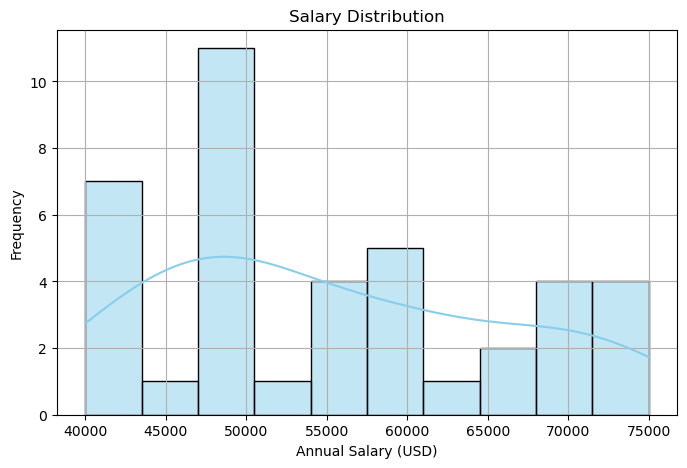

In [100]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Annual Salary (USD)'], bins=10, kde=True, color='skyblue')
plt.title("Salary Distribution")
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


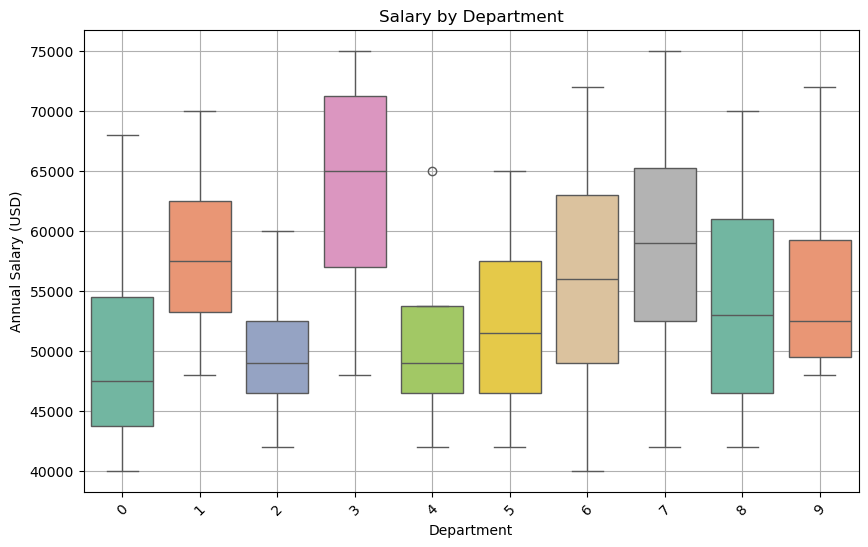

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Annual Salary (USD)', data=df, palette='Set2')
plt.title("Salary by Department")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


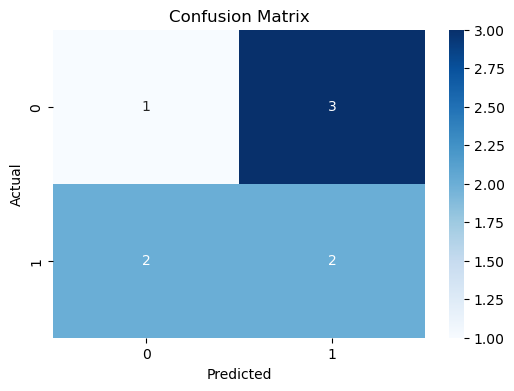

In [102]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


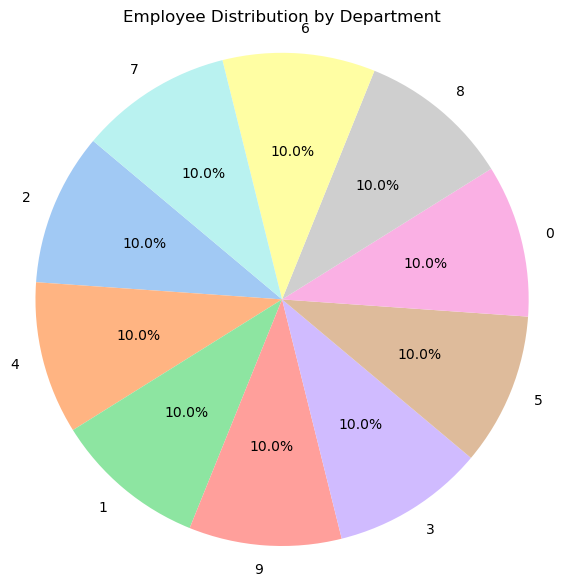

In [103]:
# Count employees per department
dept_counts = df['Department'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Employee Distribution by Department")
plt.axis('equal')
plt.show()


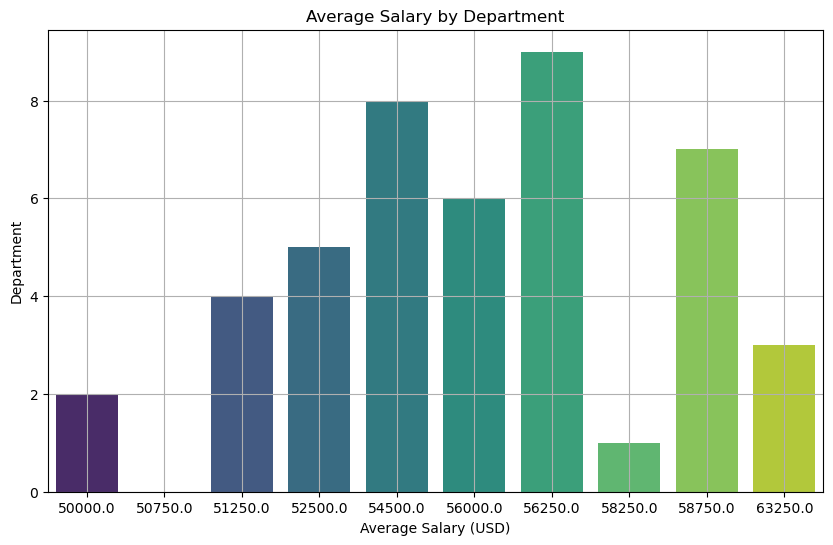

In [104]:
# Calculate average salary per department
avg_salary = df.groupby('Department')['Annual Salary (USD)'].mean().sort_values()

# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='viridis')
plt.title("Average Salary by Department")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Department")
plt.grid(True)
plt.show()
